<a href="https://colab.research.google.com/github/syhamham/AWA-Project/blob/main/electronic2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 전류 - 실증존

In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
df = pd.read_excel('data.xlsx')
df.head()

ds         y
0 2023-09-25 10:12:00  4.930000
1 2023-09-25 10:13:00  4.926667
2 2023-09-25 10:15:00  4.780000
3 2023-09-25 10:16:00  4.910000
4 2023-09-25 10:18:00  4.867885

In [3]:
df.tail()

ds      y
22162 2023-10-23 12:47:00  5.300
22163 2023-10-23 12:48:00  5.150
22164 2023-10-23 12:49:00  5.230
22165 2023-10-23 12:50:00  5.095
22166 2023-10-23 12:51:00  5.160

In [4]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpptpwwj3_/0ngfkuxq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpptpwwj3_/h9irunp8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89084', 'data', 'file=/tmp/tmpptpwwj3_/0ngfkuxq.json', 'init=/tmp/tmpptpwwj3_/h9irunp8.json', 'output', 'file=/tmp/tmpptpwwj3_/prophet_modelbt2cjf5i/prophet_model-20240514070756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [5]:
future = m.make_future_dataframe(periods=60, freq='1min')
future.tail(60)

ds
22159 2023-10-23 12:52:00
22160 2023-10-23 12:53:00
22161 2023-10-23 12:54:00
22162 2023-10-23 12:55:00
22163 2023-10-23 12:56:00
22164 2023-10-23 12:57:00
22165 2023-10-23 12:58:00
22166 2023-10-23 12:59:00
22167 2023-10-23 13:00:00
22168 2023-10-23 13:01:00
22169 2023-10-23 13:02:00
22170 2023-10-23 13:03:00
22171 2023-10-23 13:04:00
22172 2023-10-23 13:05:00
22173 2023-10-23 13:06:00
22174 2023-10-23 13:07:00
22175 2023-10-23 13:08:00
22176 2023-10-23 13:09:00
22177 2023-10-23 13:10:00
22178 2023-10-23 13:11:00
22179 2023-10-23 13:12:00
22180 2023-10-23 13:13:00
22181 2023-10-23 13:14:00
22182 2023-10-23 13:15:00
22183 2023-10-23 13:16:00
22184 2023-10-23 13:17:00
22185 2023-10-23 13:18:00
22186 2023-10-23 13:19:00
22187 2023-10-23 13:20:00
22188 2023-10-23 13:21:00
22189 2023-10-23 13:22:00
22190 2023-10-23 13:23:00
22191 2023-10-23 13:24:00
22192 2023-10-23 13:25:00
22193 2023-10-23 13:26:00
22194 2023-10-23 13:27:00
22195 2023-10-23 13:28:00
22196 2023-10-23 13:29:00
22197 2023-10-23 13:30:00
22198 2023-10-23 13:31:00
22199 2023-10-23 13:32:00
22200 2023-10-23 13:33:00
22201 2023-10-23 13:34:00
22202 2023-10-23 13:35:00
22203 2023-10-23 13:36:00
22204 2023-10-23 13:37:00
22205 2023-10-23 13:38:00
22206 2023-10-23 13:39:00
22207 2023-10-23 13:40:00
22208 2023-10-23 13:41:00
22209 2023-10-23 13:42:00
22210 2023-10-23 13:43:00
22211 2023-10-23 13:44:00
22212 2023-10-23 13:45:00
22213 2023-10-23 13:46:00
22214 2023-10-23 13:47:00
22215 2023-10-23 13:48:00
22216 2023-10-23 13:49:00
22217 2023-10-23 13:50:00
22218 2023-10-23 13:51:00

In [6]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
22214 2023-10-23 13:47:00  5.029592    4.887968    5.168622
22215 2023-10-23 13:48:00  5.029398    4.885977    5.166890
22216 2023-10-23 13:49:00  5.029205    4.891294    5.159907
22217 2023-10-23 13:50:00  5.029013    4.895966    5.176484
22218 2023-10-23 13:51:00  5.028823    4.883785    5.164035

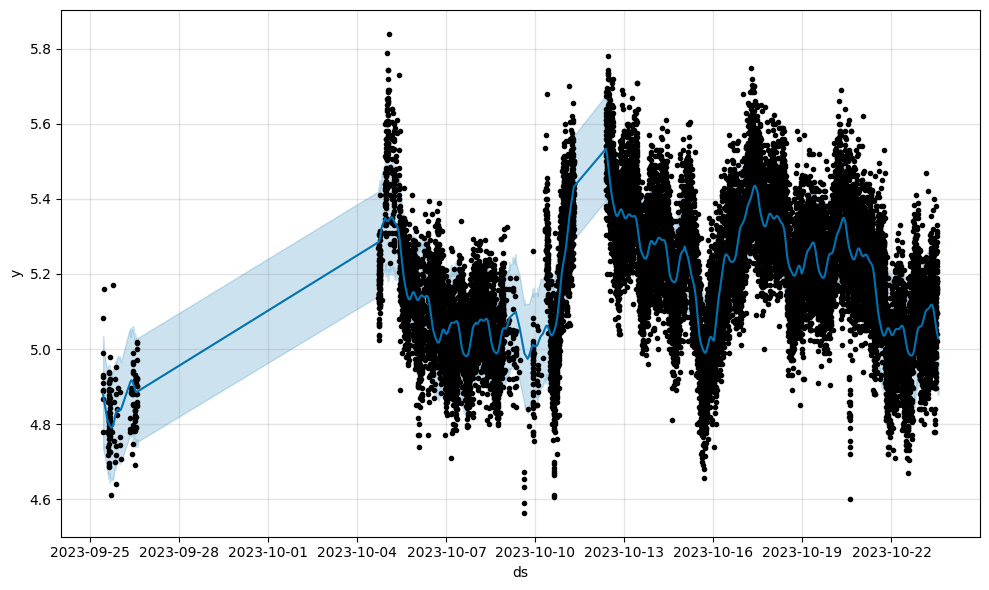

In [7]:
fig1 = m.plot(forecast)
fig1.show()

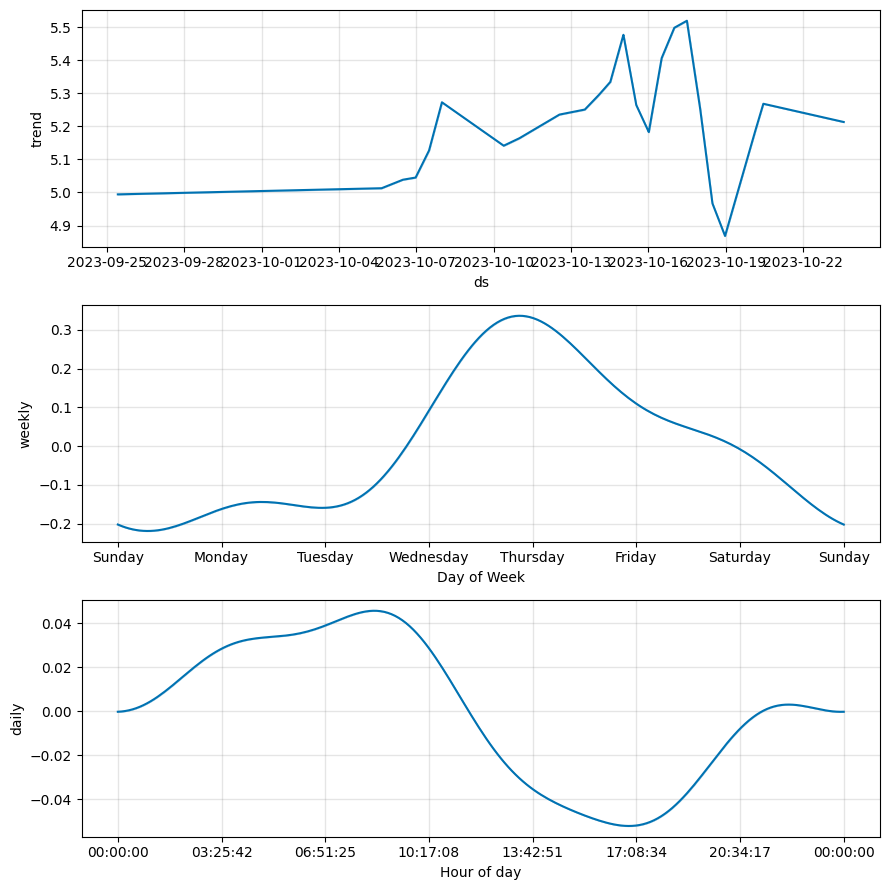

In [8]:
fig2 = m.plot_components(forecast)
fig2.show()

In [9]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [10]:
plot_components_plotly(m, forecast)